### Zadanie 6

Celem zadania jest zweryfikowanie symulacyjnie trzech praw arcusa sinusa dla procesu Wienera, porównując empiryczne dystrybuanty z teoretycznymi oraz histogramów z gęstoscią teoretyczną rozkłądu arcusa sinusa.

W pierwszej kolejnosci zostały zaimplementowane teoretyczna gęstość i dystrybuanta rozkłądu arcusa sinusa w oparciu o wzory:
\begin{equation}
    p_X(x)=\frac{1}{\pi\sqrt{x(1-x)}} \mathbb{1}_{(0,1)}(x)
\end{equation}
\begin{equation}
    F_X(x) = \begin{cases} 
        0, & x < 0, \\
        \frac{2}{\pi} \arcsin(\sqrt{x}), & x \in [0,1], \\
        1, & x > 1.
    \end{cases}
\end{equation}

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from typing import List

In [25]:
def f_arcsin(x: float) -> float:
    '''
    Funkcja gęstości rozkładu arcsin.

    Parametry:
    x: wartość zmiennej losowej

    Zwraca:
    Wartość funkcji gęstości dla x.
    '''
    if 0 < x < 1:
        return 1 / (np.pi * np.sqrt(x * (1 - x)))
    else:
        return 0

In [26]:
def F_arcsin(x: float) -> float:
    '''
    Funkcja dystrybuanty rozkładu arcsin.

    Parametry:
    x: wartość zmiennej losowej

    Zwraca:
    Wartość funkcji dystrybuanty dla x.
    '''
    if x < 0:
        return 0
    elif x > 1:
        return 1
    else:
        return (2 / np.pi) * np.arcsin(np.sqrt(x))

Generowania procesu Winera

In [27]:
def wiener_process() -> np.ndarray:
    '''
    Generuje proces Wienera.

    Zwraca:
    Proces Wienera jako tablica numpy.
    '''
    return np.cumsum(np.random.normal(0, 1.1, 10000))

In [28]:
def simulate_processes(num_simulations: int, func) -> List[float]:
    '''
    Symuluje wiele procesów Wienera i oblicza wartości dla zadanej funkcji.

    Parametry:
    num_simulations: liczba symulacji
    func: funkcja do obliczenia wartości dla każdego procesu

    Zwraca:
    Lista wartości obliczonych dla każdego procesu.
    '''
    results = []
    for _ in range(num_simulations):
        process = wiener_process()
        results.append(func(process))
    return results

### Pierwsze prawo arcusa sinusa
Pierwsze prawo mówi, że czas spędzony przez proces Wienera powyżej osi OX na odcinku [0, 1] ma rozkład arcusa sinusa.
\begin{equation}
    T_+=\lambda(\{t \in [0,1]|W_t > 0\}) \sim Arcsine,
\end{equation}
gdzie $\lambda$ to miara Lebesgue’a.

W poniższym fragmencie kodu, została obliczona proporcja czasu, jaki każda realizacja spędza powyżej osi OX na odcinku [0,1]. Następnie została z tego wyznaczona dystrybuanta empiryczna, oraz wygenerowano wykresy porównujące rozkład arcusa sinusa z czasem spędzonym przez proces Winera powyzej osi OX.

In [29]:
def time_above_zero(process: np.ndarray) -> float:
    '''
    Oblicza proporcję czasu spędzonego przez proces Wienera powyżej zera.

    Parametry:
    process: proces Wienera jako tablica numpy

    Zwraca:
    Proporcja czasu spędzonego powyżej zera.
    '''
    return np.sum(process > 0) / len(process)

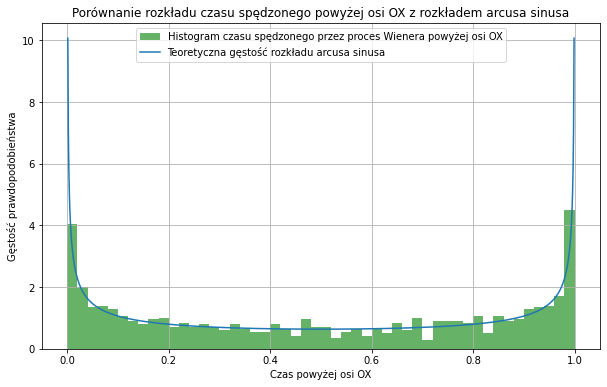

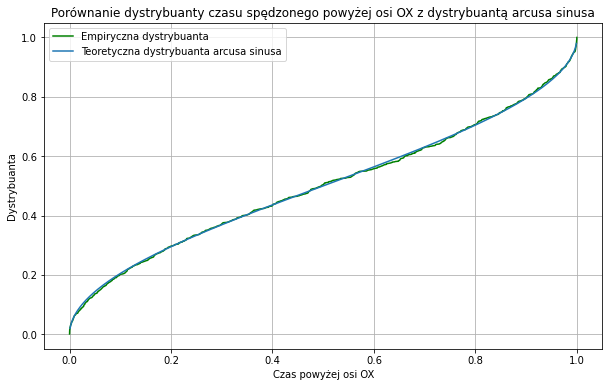

In [32]:
num_simulations = 1000

x_values = np.linspace(0.001, 0.999, 1000)
f_values = [f_arcsin(x) for x in x_values]
F_values = [F_arcsin(x) for x in x_values]

times_above_zero = simulate_processes(num_simulations, time_above_zero)
ecdf_above_zero = ECDF(times_above_zero)

plt.figure(figsize=(10, 6))
plt.hist(times_above_zero, bins=50, density=True, alpha=0.6, color='g', label='Histogram czasu spędzonego przez proces Wienera powyżej osi OX')
plt.plot(x_values, f_values, label='Teoretyczna gęstość rozkładu arcusa sinusa')
plt.title('Porównanie rozkładu czasu spędzonego powyżej osi OX z rozkładem arcusa sinusa')
plt.xlabel('Czas powyżej osi OX')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ecdf_above_zero.x, ecdf_above_zero.y, color='g', label='Empiryczna dystrybuanta')
plt.plot(x_values, F_values, label='Teoretyczna dystrybuanta arcusa sinusa')
plt.title('Porównanie dystrybuanty czasu spędzonego powyżej osi OX z dystrybuantą arcusa sinusa')
plt.xlabel('Czas powyżej osi OX')
plt.ylabel('Dystrybuanta')
plt.legend()
plt.grid(True)
plt.show()


### Drugie prawo arcusa sinusa
Drugie prawo mówi, że ostatni moment uderzenia procesu Wienera na odcinku [0, 1] w oś OX ma rozkład arcusa sinusa.
\begin{equation}
    L=sup\{t\in[0,1]|W_t=0\} \sim Arcsine
\end{equation}

In [30]:
def last_crossing_time(process: np.ndarray) -> float:
    '''
    Oblicza ostatni moment przecięcia osi OX przez proces Wienera.

    Parametry:
    process: proces Wienera jako tablica numpy

    Zwraca:
    Ostatni moment przecięcia osi OX jako proporcja długości procesu.
    '''
    last_crossing = 0
    for i in range(1, len(process)):
        if process[i-1] * process[i] < 0:
            last_crossing = i
    return last_crossing / len(process)

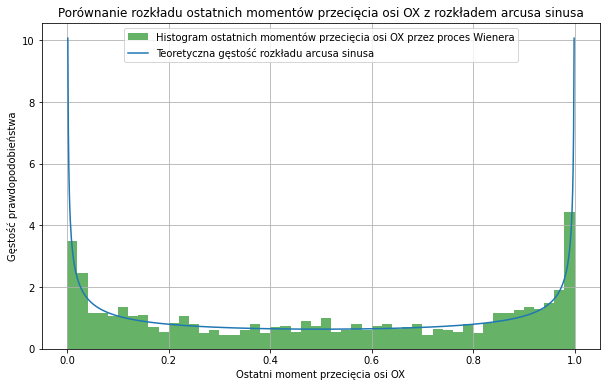

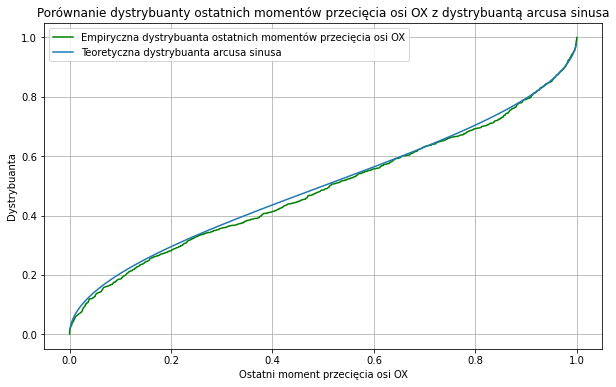

In [33]:
last_crossing_times = simulate_processes(num_simulations, last_crossing_time)
ecdf_last_hit_times = ECDF(last_crossing_times)

plt.figure(figsize=(10, 6))
plt.hist(last_crossing_times, bins=50, density=True, alpha=0.6, color='g', label='Histogram ostatnich momentów przecięcia osi OX przez proces Wienera')
plt.plot(x_values, f_values, label='Teoretyczna gęstość rozkładu arcusa sinusa')
plt.title('Porównanie rozkładu ostatnich momentów przecięcia osi OX z rozkładem arcusa sinusa')
plt.xlabel('Ostatni moment przecięcia osi OX')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ecdf_last_hit_times.x, ecdf_last_hit_times.y, color='g', label='Empiryczna dystrybuanta ostatnich momentów przecięcia osi OX')
plt.plot(x_values, F_values, label='Teoretyczna dystrybuanta arcusa sinusa')
plt.title('Porównanie dystrybuanty ostatnich momentów przecięcia osi OX z dystrybuantą arcusa sinusa')
plt.xlabel('Ostatni moment przecięcia osi OX')
plt.ylabel('Dystrybuanta')
plt.legend()
plt.grid(True)
plt.show()

### Trzecie prawo arcusa sinusa
To prawo mówi, że moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0,1] ma rozkład arcusa sinusa.
\begin{equation}
    W_M=sup\{W_t|t\in[0,1]\}, 
\end{equation}
Wtedy M $\sim$ Arcsin

Poniżej znajduje się kod słuzący do wyznaczania momentów, w których proces osiąga swoją maksymalną wartość. Następnie generowane są wykresy porównawcze.

In [31]:
def max_value_time(process: np.ndarray) -> float:
    '''
    Oblicza moment osiągnięcia maksymalnej wartości przez proces Wienera.

    Parametry:
    process: proces Wienera jako tablica numpy

    Zwraca:
    Moment osiągnięcia maksymalnej wartości jako proporcja długości procesu.
    '''
    max_value = process[0]
    max_index = 0
    for i in range(1, len(process)):
        if process[i] > max_value:
            max_value = process[i]
            max_index = i
    return max_index / len(process)

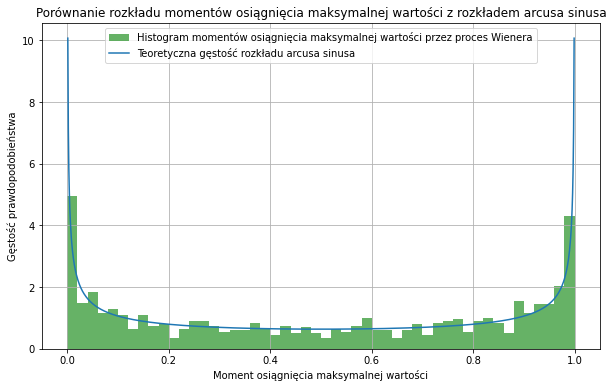

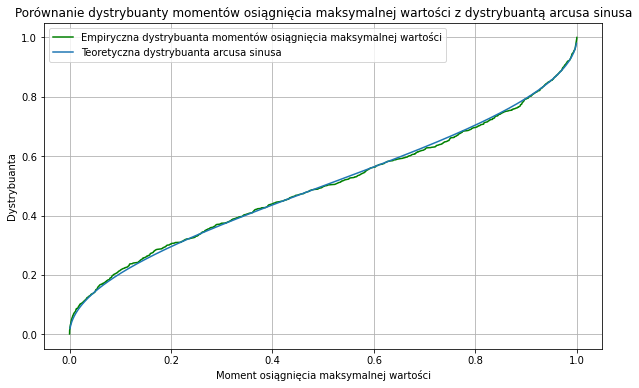

In [34]:
max_value_times = simulate_processes(num_simulations, max_value_time)
ecdf_max_value_times = ECDF(max_value_times)

plt.figure(figsize=(10, 6))
plt.hist(max_value_times, bins=50, density=True, alpha=0.6, color='g', label='Histogram momentów osiągnięcia maksymalnej wartości przez proces Wienera')
plt.plot(x_values, f_values, label='Teoretyczna gęstość rozkładu arcusa sinusa')
plt.title('Porównanie rozkładu momentów osiągnięcia maksymalnej wartości z rozkładem arcusa sinusa')
plt.xlabel('Moment osiągnięcia maksymalnej wartości')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ecdf_max_value_times.x, ecdf_max_value_times.y, color='g', label='Empiryczna dystrybuanta momentów osiągnięcia maksymalnej wartości')
plt.plot(x_values, F_values, label='Teoretyczna dystrybuanta arcusa sinusa')
plt.title('Porównanie dystrybuanty momentów osiągnięcia maksymalnej wartości z dystrybuantą arcusa sinusa')
plt.xlabel('Moment osiągnięcia maksymalnej wartości')
plt.ylabel('Dystrybuanta')
plt.legend()
plt.grid(True)
plt.show()